In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from skimage.io import imread

<IPython.core.display.Javascript object>


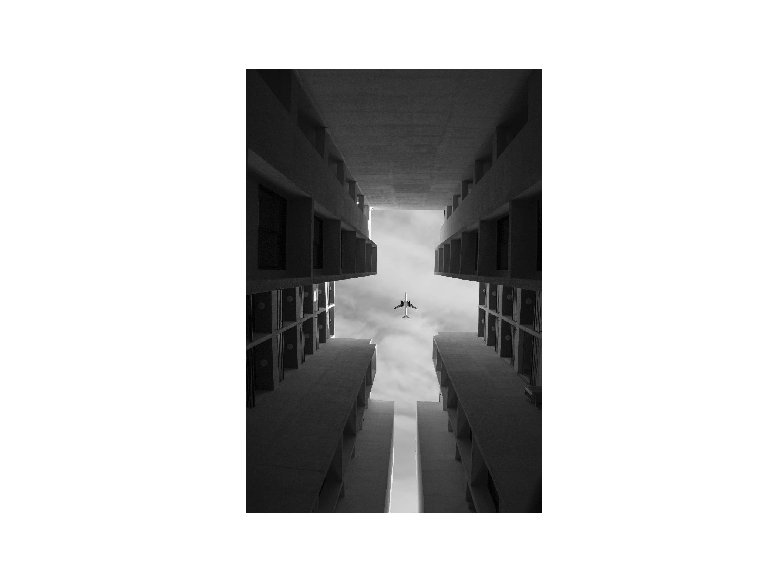

In [3]:
im = imread('airplane.jpg')

plt.figure()
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


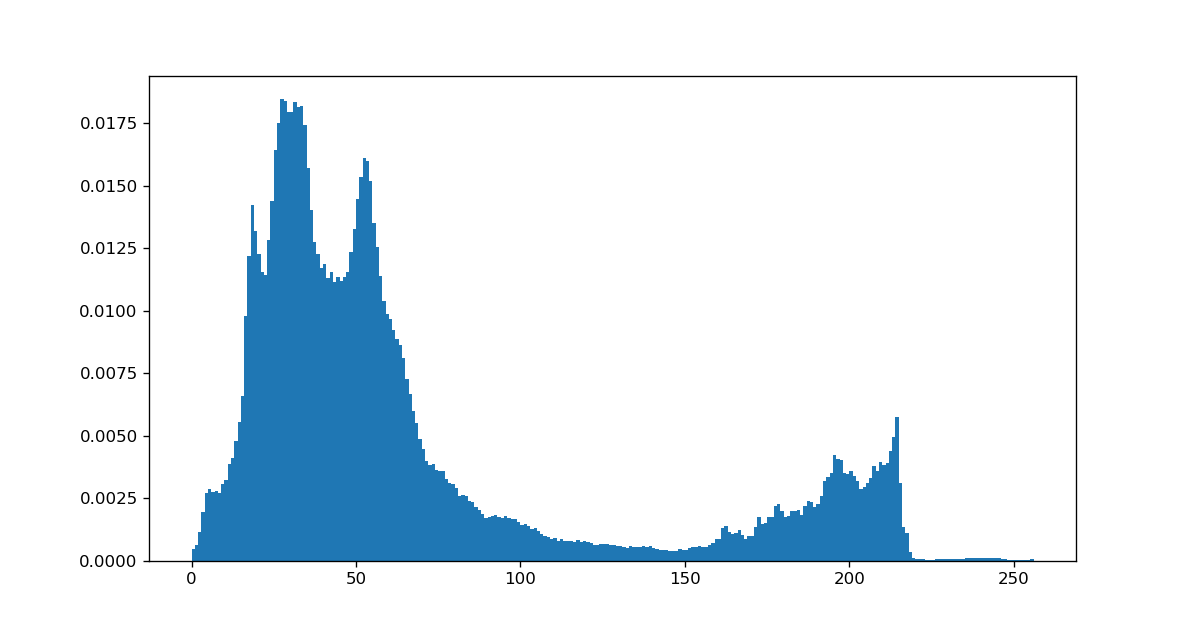

C:\Users\8Utilisateur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


In [5]:
plt.figure()
plt.hist(im.flatten(), bins=np.arange(257), normed=True)
plt.show()

## Otsu threshold algorithm:

Given a normed histogram $H = \{h_i\}, i \in [0,255], \sum_{i=0}^{255}{h_i} = 1$:

For each possible threshold $t \in [0,255]$:

* Cut the distribution in two: $H_1 = \{h_i\}, i \in [0,t[$, etc...
* Compute:
    * Class probabilities: $w_1 = \sum_{i=0}^{t-1}{h_i}$, ...
    * Class centroids: $m_1 = \frac{\sum_{i=0}^{t-1}{h_i * i}}{w_1}$, ...
    * Class variances: $\sigma_1 = \frac{\sum_{i=0}^{t-1}{h_i*(i-m_1)^2}}{w_1}$
    * Intra-class variance: $\sigma_{w} = w_1*\sigma_1 + w_2*\sigma_2$
    * Inter-class variance: $\sigma_{b} = w_1*w_2*((m_2-m_1)^2)$
    * Separability: $\lambda = \frac{\sigma_{b}}{\sigma_{w}}$
* Choose $t$ that maximizes $\lambda$

In [7]:
def otsu_threshold(h):
    h = h*1./h.sum() # Probability histogram
    
    # Check every possible threshold
    var_within = np.zeros(len(h))
    var_between = np.zeros(len(h))
    sep = np.zeros(len(h))
    
    for t in range(1,len(h)-1):
        # Class probabilities
        w1 = h[:t].sum()
        w2 = h[t:].sum()
        # Class means
        m1 = (np.arange(0,t)*h[:t]).sum()/w1
        m2 = (np.arange(t,len(h))*h[t:]).sum()/w2
        # Class variances
        s1 = (((np.arange(0,t)-m1)**2)*h[:t]).sum()/w1
        s2 = (((np.arange(t,len(h))-m2)**2)*h[t:]).sum()/w2
        # Intra-class
        sw = w1*s1+w2*s2
        # Inter-class
        sb = w1*w2*((m2-m1)**2)
        # Separability
        var_within[t] = sw
        var_between[t] = sb
    
    sep[1:-1] = var_between[1:-1]/var_within[1:-1]
    best_t = np.argmax(sep)
    
    return best_t, var_within, var_between, sep

<IPython.core.display.Javascript object>


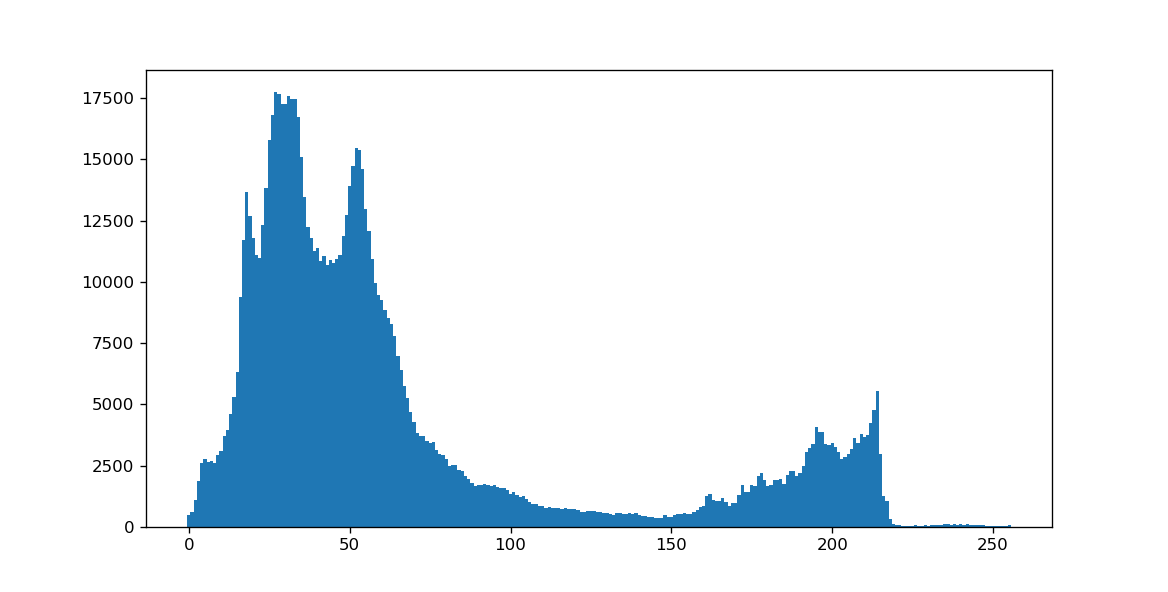

Otsu threshold : 115


<IPython.core.display.Javascript object>


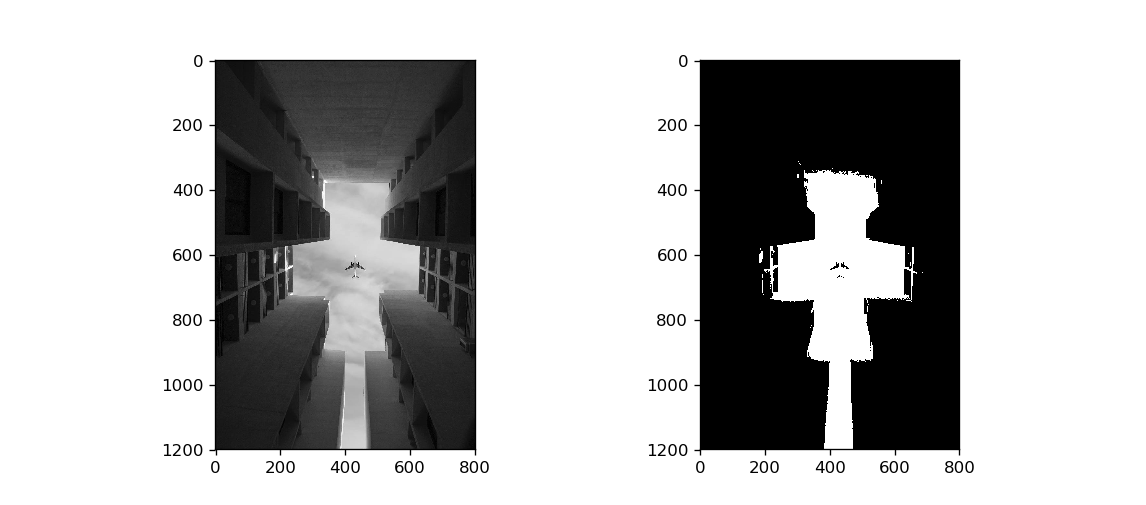

<IPython.core.display.Javascript object>


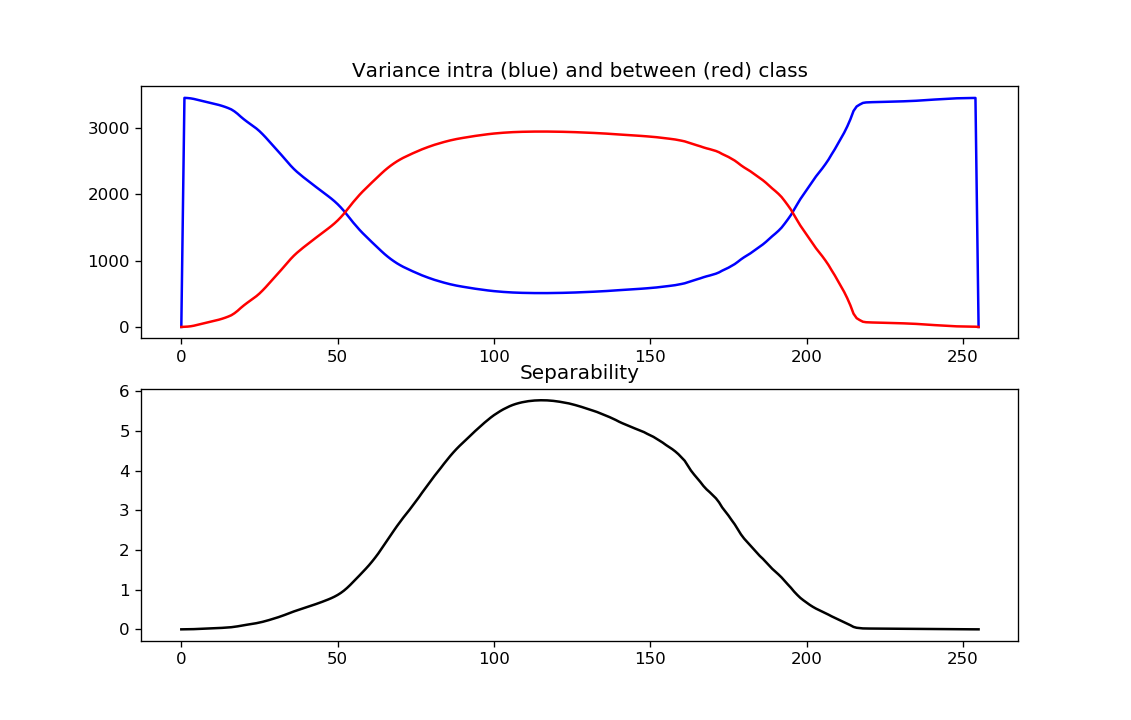

In [8]:
h,bins = np.histogram(im.flatten(),range(257))
plt.figure()
plt.bar(bins[:-1],h,bins[1]-bins[0])
plt.show()

t,vw,vb,sep = otsu_threshold(h)
print("Otsu threshold : %d"%t)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(im>t, cmap=plt.cm.gray)

plt.figure()
plt.subplot(2,1,1)
plt.plot(vw, 'b-')
plt.plot(vb, 'r-')
plt.title('Variance intra (blue) and between (red) class')
plt.subplot(2,1,2)
plt.plot(sep, 'k-')
plt.title('Separability')
plt.show()

<IPython.core.display.Javascript object>


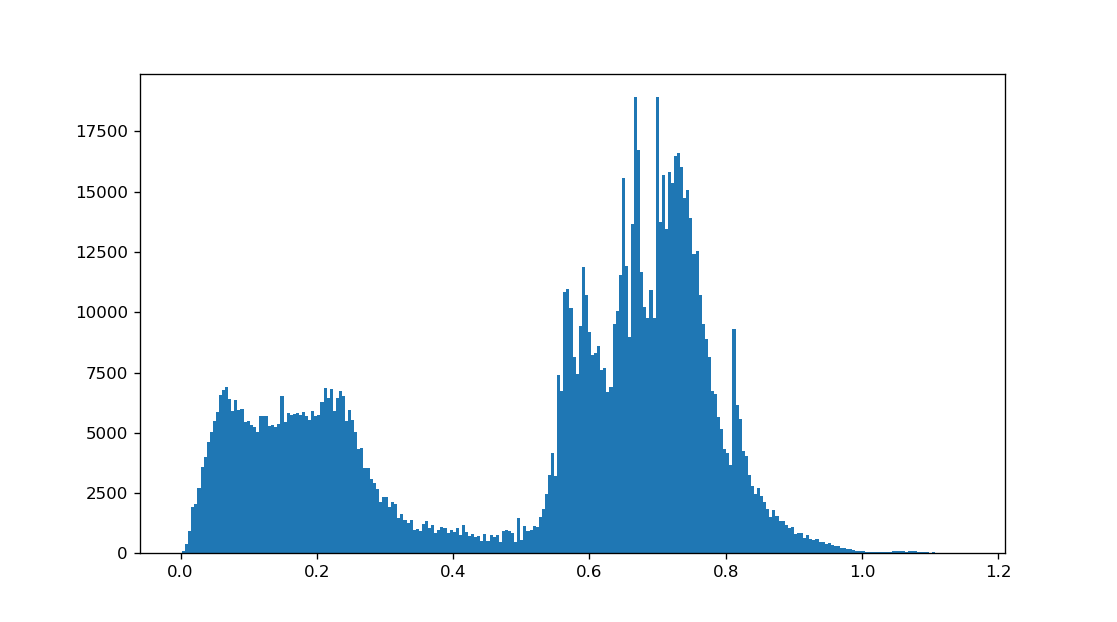

In [9]:
from skimage.color import rgb2hsv

def distance_color_space(im, coords):
    refcolor = im[coords[0],coords[1]]
    dmap = np.sqrt(((im-refcolor)**2).sum(axis=2))
    return dmap

im = imread('etretat.jpg')
hsv = rgb2hsv(im)

coords = (200,600)

dmap = distance_color_space(hsv.astype('float'), coords)
h,bins = np.histogram(dmap.flatten(),bins=256)

plt.figure()
plt.bar(bins[:-1],h,bins[1]-bins[0])
plt.show()

Otsu threshold : 0.435


<IPython.core.display.Javascript object>


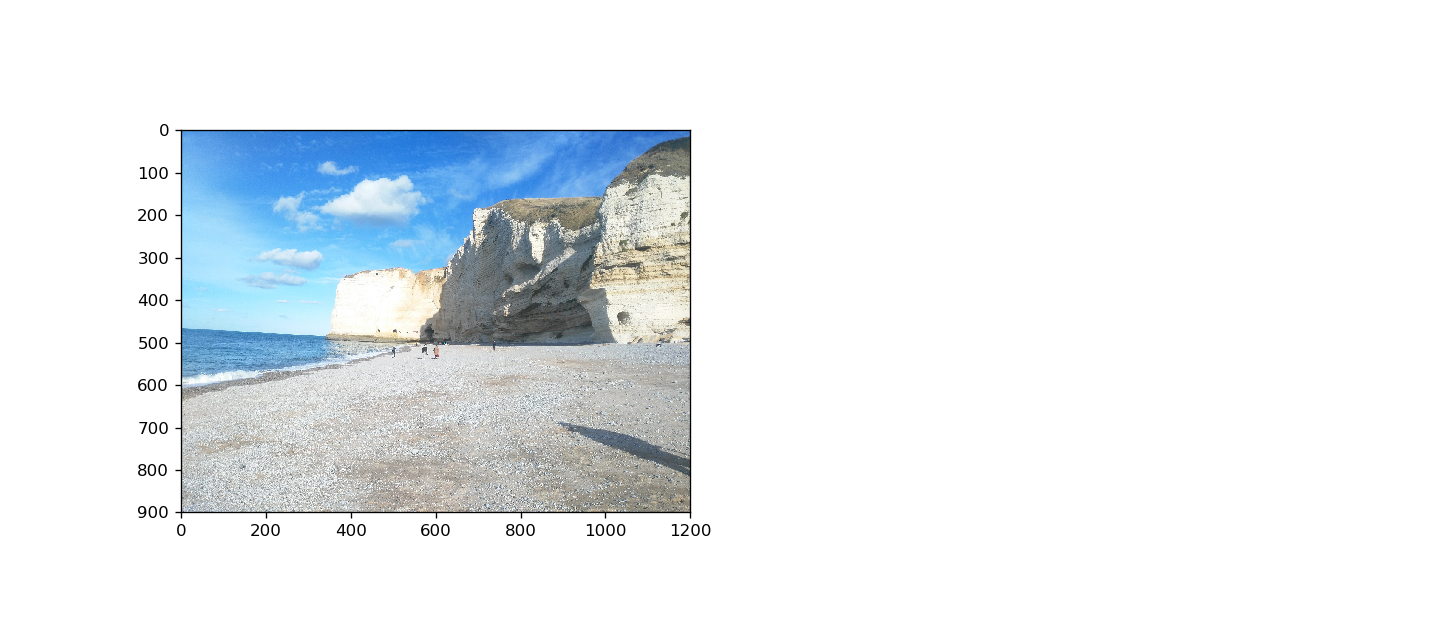

<IPython.core.display.Javascript object>


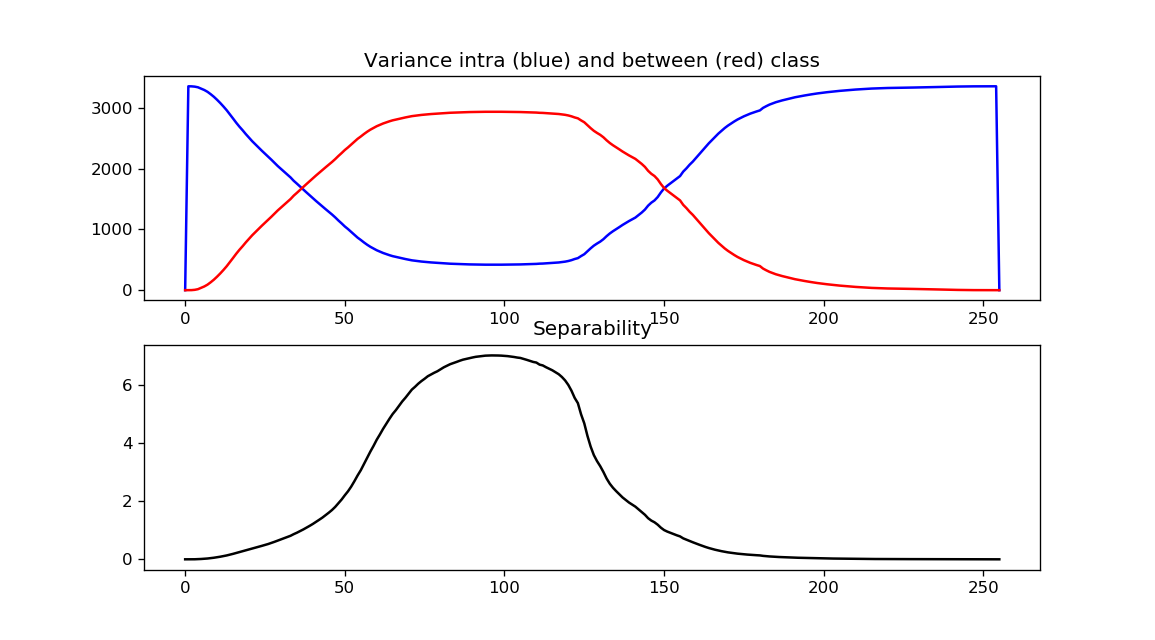

In [10]:
b,vw,vb,sep = otsu_threshold(h)
t = (bins[b]+bins[b+1])/2
print("Otsu threshold : %.3f"%t)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(im, cmap=plt.cm.gray, vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(im>t, cmap=plt.cm.gray)

plt.figure()
plt.subplot(2,1,1)
plt.plot(vw, 'b-')
plt.plot(vb, 'r-')
plt.title('Variance intra (blue) and between (red) class')
plt.subplot(2,1,2)
plt.plot(sep, 'k-')
plt.title('Separability')
plt.show()

<IPython.core.display.Javascript object>


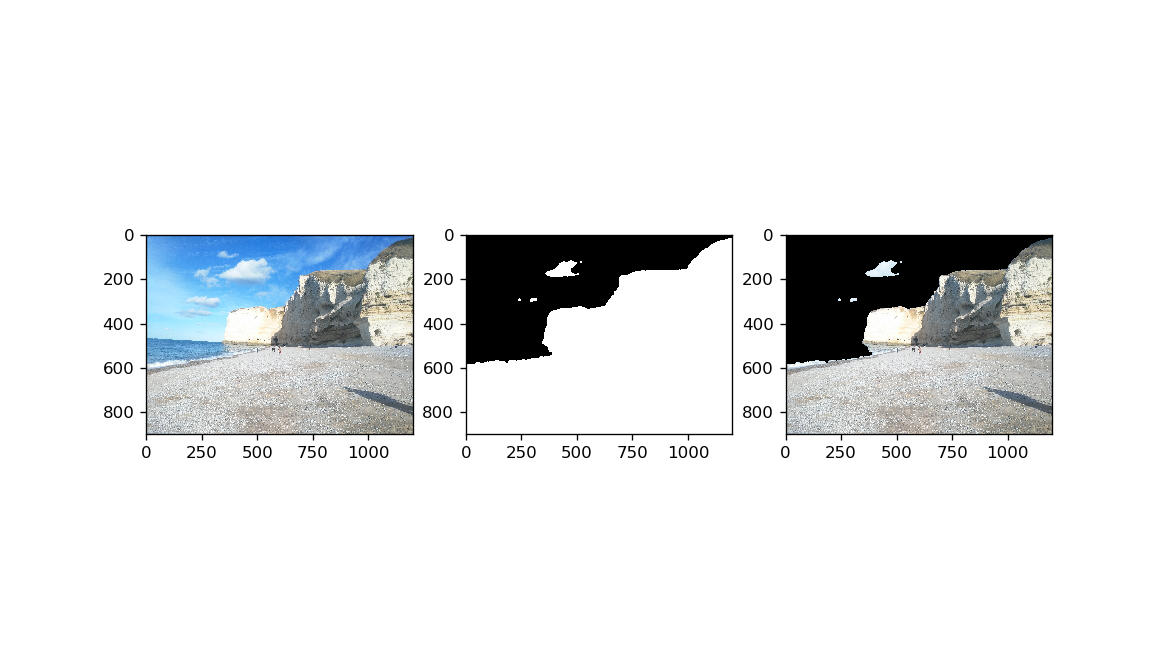

In [11]:
from skimage.morphology import opening,closing,disk

mask = dmap>t
mask = closing(opening(mask, disk(5)),disk(5))

im_m = im.copy()
im_m[mask==False] = 0

plt.figure()
plt.subplot(1,3,1)
plt.imshow(im, cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.imshow(mask, cmap=plt.cm.gray)
plt.subplot(1,3,3)
plt.imshow(im_m, cmap=plt.cm.gray)
plt.show()